## Проект 8. Сбореый_проект_2. Добыча золота.

### Описание проекта и постановка задачи.

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды.
Решите сами, какие детали нужны для построения модели, а какие — нет.

### Описание данных.

Данные находятся в трёх файлах:
* gold_recovery_train.csv — обучающая выборка;
* gold_recovery_test.csv — тестовая выборка;
* gold_recovery_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date).  
Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Загрузка и подготовка данных
1.1. Откройте файлы и изучите их.
Путь к файлам:
* /datasets/gold_recovery_train.csv.
* /datasets/gold_recovery_test.csv.
* /datasets/gold_recovery_full.csv.  

1.2. Проверьте, что эффективность обогащения рассчитана правильно.
Вычислите её на обучающей выборке для признака rougher.output.recovery.
Найдите MAE между вашими расчётами и значением признака. Опишите
выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это
за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats as st
from IPython.display import display
import seaborn as sns
#from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #, accuracy_score, f1_score, confusion_matrix, roc_auc_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression #,LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

### Загрузка данных

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

### Изучение данных

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(data_train.sample(3).T)
#display(data_test.sample(3))
#display(data_full.sample(3))

,2598,4732,1724
date,2016-05-02 05:59:59,2016-07-30 03:59:59,2016-03-26 20:00:00
final.output.concentrate_ag,5.86503,4.72218,5.57707
final.output.concentrate_pb,9.32317,11.3041,11.3468
final.output.concentrate_sol,10.0948,9.03842,6.94699
final.output.concentrate_au,45.4776,43.3167,43.9786
final.output.recovery,61.3692,67.7285,62.126
final.output.tail_ag,8.46312,8.49074,10.4277
final.output.tail_pb,1.95834,2.50233,1.26154
final.output.tail_sol,13.8448,9.83888,17.1345
final.output.tail_au,3.40744,2.82966,2.97859


In [4]:
#data_train.info()
#data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
#переименуем названия столбцов
for df in [data_train, data_test, data_full]:
    columns=df.columns
    columns1 = [row.replace('.', '_') for row in columns]
    columns2 = [row.replace('primary_cleaner', '1cl') for row in columns1]
    columns3 = [row.replace('rougher', '0cl') for row in columns2]
    columns4 = [row.replace('secondary_cleaner', '2cl') for row in columns3]
    columns5 = [row.replace('floatbank', 'fb') for row in columns4]
    columns6 = [row.replace('concentrate', 'con') for row in columns5]
    columns7 = [row.replace('input', 'in') for row in columns6]
    columns8 = [row.replace('output', 'out') for row in columns7]
    columns9 = [row.replace('state', 'st') for row in columns8]
    columns10 = [row.replace('calculation', 'calc') for row in columns9]
    df.set_axis(columns10, axis='columns', inplace=True)
data_train.columns

Index(['date', 'final_out_con_ag', 'final_out_con_pb', 'final_out_con_sol',
       'final_out_con_au', 'final_out_recovery', 'final_out_tail_ag',
       'final_out_tail_pb', 'final_out_tail_sol', 'final_out_tail_au',
       '1cl_in_sulfate', '1cl_in_depressant', '1cl_in_feed_size',
       '1cl_in_xanthate', '1cl_out_con_ag', '1cl_out_con_pb',
       '1cl_out_con_sol', '1cl_out_con_au', '1cl_out_tail_ag',
       '1cl_out_tail_pb', '1cl_out_tail_sol', '1cl_out_tail_au',
       '1cl_st_fb8_a_air', '1cl_st_fb8_a_level', '1cl_st_fb8_b_air',
       '1cl_st_fb8_b_level', '1cl_st_fb8_c_air', '1cl_st_fb8_c_level',
       '1cl_st_fb8_d_air', '1cl_st_fb8_d_level', '0cl_calc_sulfate_to_au_con',
       '0cl_calc_fb10_sulfate_to_au_feed', '0cl_calc_fb11_sulfate_to_au_feed',
       '0cl_calc_au_pb_ratio', '0cl_in_feed_ag', '0cl_in_feed_pb',
       '0cl_in_feed_rate', '0cl_in_feed_size', '0cl_in_feed_sol',
       '0cl_in_feed_au', '0cl_in_fb10_sulfate', '0cl_in_fb10_xanthate',
       '0cl_in_fb11_sulf

In [6]:
display(data_train.loc[:, ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']].sample(5).T)

,12556,14882,9193,573,11303
0cl_in_feed_au,9.295797,8.548549,8.919545,4.577792,7.023334
0cl_out_con_au,21.171029,0.011601,17.752122,19.735387,18.853447
1cl_out_con_au,31.001644,33.145947,35.604019,40.571532,32.626604
final_out_con_au,45.236077,46.841390,44.701587,45.939277,45.491305


### Проверка правильности расчета rougher.output.recovery

In [7]:
#вынесем необходимые данные в отдельный df
data_MAE = data_train.loc[:, ['0cl_out_recovery', '0cl_out_con_au', '0cl_in_feed_au', '0cl_out_tail_au']]

_c1 = data_MAE['0cl_out_con_au']
_f1 = data_MAE['0cl_in_feed_au']
_t1 = data_MAE['0cl_out_tail_au']
data_MAE['0cl_out_recovery_2'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

data_MAE.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE.dropna(subset=['0cl_out_recovery_2'], inplace=True) 
print()
data_MAE.info()

print('Нет первоначального расчета rougher.output.recovery')
display(data_MAE[data_MAE['0cl_out_recovery']!=data_MAE['0cl_out_recovery']].sample(5).T)

data_MAE.dropna(inplace=True)

display(data_MAE.loc[:, ['0cl_out_recovery', '0cl_out_recovery_2']].sample(5).T)
MAE = mean_absolute_error(data_MAE['0cl_out_recovery'], data_MAE['0cl_out_recovery_2'])
print(MAE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      16778 non-null  float64
 2   0cl_in_feed_au      16777 non-null  float64
 3   0cl_out_tail_au     14611 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      14577 non-null  float64
 2   0cl_in_feed_au      14577 non-null  float64
 3   0cl_out_tail_au     14577 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 683.3 KB
Нет первонача

,10286,7197,837,2072,9311
0cl_out_recovery,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,2.208876,5.978189,8.347044,6.544348,3.791287
0cl_in_feed_au,7.008153,9.556149,11.484935,7.069204,7.291253
0cl_out_tail_au,1.646809,1.245675,1.521192,3.504448,1.992816
0cl_out_recovery_2,300.644600,109.855202,106.088867,108.559127,153.189407


,10784,11208,14651,15002,10101
0cl_out_recovery,86.530596,84.893942,86.576103,91.021578,79.154989
0cl_out_recovery_2,86.530596,84.893942,86.576103,91.021578,79.154989


9.444891926100695e-15


### Проверка правильности расчета final.output.recovery
Не понятно какие значения идут в формулу для расчета

In [8]:
#вынесем необходимые данные в отдельный df
data_MAE_2 = data_train.loc[:, ['final_out_recovery', 'final_out_con_au', '0cl_out_con_au', 'final_out_tail_au']]

_c2 = data_MAE_2['final_out_con_au'] 
_f2 = data_MAE_2['0cl_out_con_au']
_t2 = data_MAE_2['final_out_tail_au']
data_MAE_2['final_out_recovery_2'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

data_MAE_2.dropna(inplace=True)

display(data_MAE_2.loc[:, ['final_out_recovery', 'final_out_recovery_2']].sample(5).T)

,14369,13331,294,15769,15746
final_out_recovery,51.005827,77.701498,69.439973,73.165723,73.317977
final_out_recovery_2,70.350524,94.172268,92.035380,94.074047,93.644950


Расчет rougher.output.recovery в исходных данных произведен правильно, но не для всех строк.

In [9]:
au_con = ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']
ag_con = ['0cl_in_feed_ag', '0cl_out_con_ag', '1cl_out_con_ag', 'final_out_con_ag']
pb_con = ['0cl_in_feed_pb', '0cl_out_con_pb', '1cl_out_con_pb', 'final_out_con_pb']
legend = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']

In [10]:
display(data_train[data_train['0cl_out_con_au']<2][au_con].sample(5).T)
display(data_train[data_train['1cl_out_con_au']<2][au_con].sample(5).T)
display(data_train[data_train['final_out_con_au']<2][au_con].sample(5).T)

,4792,3070,13548,1848,11481
0cl_in_feed_au,9.086508,0.0,0.01,1.612422,0.0
0cl_out_con_au,0.000000,0.0,0.01,0.000000,0.0
1cl_out_con_au,35.054786,0.0,0.01,0.000000,0.0
final_out_con_au,43.902936,0.0,0.01,0.000000,0.0


,14299,12042,16351,11931,14601
0cl_in_feed_au,0.748198,0.0,9.933880,0.0,0.01
0cl_out_con_au,15.335469,0.0,21.517371,0.0,0.01
1cl_out_con_au,0.010000,0.0,0.010000,0.0,0.01
final_out_con_au,49.262176,0.0,48.049003,0.0,0.01


,16265,2024,16183,126,12581
0cl_in_feed_au,0.01,0.0,0.01,0.0,0.01
0cl_out_con_au,0.01,0.0,0.01,0.0,0.01
1cl_out_con_au,0.01,0.0,0.01,0.0,0.01
final_out_con_au,0.01,0.0,0.01,0.0,0.01


Есть ошибочные 0 и околонулевые значения. 

### Выводы по данным

Столбец date - перевести в формат DateTime и выделить год, месяц и день  
Столбец rougher.output.recovery рассчитан не для всех строк где возможно.
Есть 0 и околонулевые значения в столбцах 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' являющиеся ошибкой. 

### Подготовка данных

## Анализ данных
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на
различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и
тестовой выборках. Если распределения сильно отличаются друг от друга,
оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.


### Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

In [11]:
display(data_train.loc[:, au_con].sample(5).T)

,15728,12883,13153,84,11833
0cl_in_feed_au,5.575406,10.488259,8.357095,7.038831,10.284806
0cl_out_con_au,16.677451,20.421413,20.445118,18.835834,20.177320
1cl_out_con_au,34.438821,30.597348,34.386251,35.948046,0.000000
final_out_con_au,46.128300,42.184396,44.220527,44.024191,40.469866


In [12]:
display(data_train[au_con].mean())

0cl_in_feed_au       7.170717
0cl_out_con_au      17.401541
1cl_out_con_au      29.164596
final_out_con_au    39.467217
dtype: float64

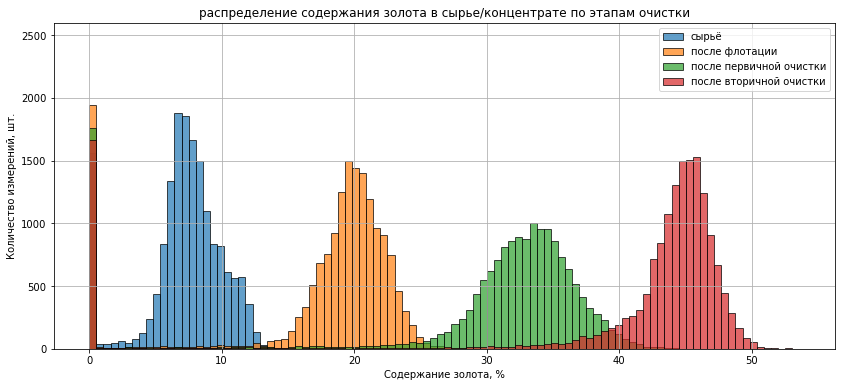

In [19]:
data_train[au_con].plot.hist(bins=100, edgecolor = 'black', ylim=(0, 2600), figsize=(14, 6), grid=True, alpha = 0.7)
plt.title("распределение содержания золота в сырье/концентрате по этапам очистки"); 
plt.ylabel("Количество измерений, шт.")
plt.xlabel("Содержание золота, %")
plt.legend(legend);

#### Серебро

In [14]:
display(data_train.loc[:, ag_con].sample(5).T)

,8905,7919,12852,14157,10967
0cl_in_feed_ag,9.409039,10.110099,12.081859,7.764380,6.303609
0cl_out_con_ag,12.169738,12.312768,12.870105,12.000633,9.261256
1cl_out_con_ag,8.799020,8.301542,9.920217,9.576979,6.347473
final_out_con_ag,5.705758,4.869296,5.843037,5.066572,4.001944


In [15]:
display(data_train[ag_con].mean())

0cl_in_feed_ag       7.832347
0cl_out_con_ag      10.580475
1cl_out_con_ag       7.422640
final_out_con_ag     4.716907
dtype: float64

#### Свинец

In [16]:
display(data_train.loc[:, pb_con].sample(5).T)

,8840,16797,13361,1976,5384
0cl_in_feed_pb,4.411226,1.627427,4.927175,NaN,3.458127
0cl_out_con_pb,8.761786,7.923573,9.413524,NaN,7.844557
1cl_out_con_pb,11.533431,10.607699,6.255308,NaN,11.080373
final_out_con_pb,11.799367,10.280471,12.068588,NaN,11.030760


In [17]:
display(data_train[pb_con].mean())

0cl_in_feed_pb      3.218931
0cl_out_con_pb      6.880322
1cl_out_con_pb      8.620294
final_out_con_pb    9.113559
dtype: float64

Концентрация золота с каждым этапом растет на 10-12%, что на выходе позволяет увеличить его содержание до 40-50%. При этом содержание серебра после флотации немного возрастает, а далее падает, а свинец значительно прибавляет на флотации и немного после 1 и 2 очистки.

## Обучение и проверка модели
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией.
Выберите лучшую модель и проверьте её на тестовой выборке. Опишите
выводы.

Вам пригодятся формулы метрик качества: см. пдф или распечатку


### Разделение данных на обучающую и валидационную выборки

In [18]:
123features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    data_0.drop(['product'], axis=1), data_0['product'], test_size=0.25, random_state=123)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    data_1.drop(['product'], axis=1), data_1['product'], test_size=0.25, random_state=123)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    data_2.drop(['product'], axis=1), data_2['product'], test_size=0.25, random_state=123)

SyntaxError: invalid syntax (<ipython-input-18-5255df33d2c7>, line 1)

### Обучение моделей

In [ ]:
123model = LinearRegression()

model.fit(features_train_0, target_train_0)
predictions_valid_0 = model.predict(features_valid_0)
pred_0_mean = predictions_valid_0.mean()
RMSE_0 = mean_squared_error(target_valid_0, predictions_valid_0)**0.5
R2_0 = r2_score(target_valid_0, predictions_valid_0)
print('Регион 0.  Cредний запас предсказанного сырья: %.1f' %pred_0_mean, ' RMSE модели: %.1f' %RMSE_0)
predictions_valid_0=pd.Series(predictions_valid_0, index=target_valid_0.index)

### Выводы по моделям для регионов

## Подготовка к расчёту прибыли

## Функция для расчёта прибыли 

## Расчет прибыли и оценка рисков 

### Регион 0

### Сравнение регинонов

В ходе исследования получены следующие характеристики:  

Характеристика | Регион 0 | Регион 1 | Регион 2
--- |--- | --- | ---
Cредний запас сырья (факт) (тыс. бар) | 92,9 | 69,3 | 94,9
--- |--- | --- | ---
LinearRegression() |--- | --- | ---
Cредний запас предсказанного сырья (тыс. бар)  | 92,5 | 69,3 | 95,1
RMSE (тыс. бар) | 37,6 | 0,9 | 40,1
R2 | 0.2813 | 0.9996 | 0.1931
--- |--- | --- | ---
Прибыль и риски |--- | --- | --- 
Средняя предсказанная прибыль (млн. руб.) |501.7 | 520.4 | 375.7
95 процентный доверительный интервал (млн. руб.) |-17.8  /  998.3 | 106.7  /  952.1 | -173.8  /  912.8
Вероятность убытков (млн. руб.) | 0.027| 0.002 | 0.095

## Выводы